Projet M8 : Analyse de données réelles

Introduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
noms = []

with open('communities.names', 'r') as f:
    for _ in range(75): #il y a des lignes de texte avant les noms
        (f.readline().strip())
    for _ in range(128):
        noms.append(f.readline().strip())

data = pd.read_csv('communities.data', header=None, na_values='?') #on utilise pandas à cause des (?)

data_quantitatives=data.drop(columns=[0,1,2,3,4]) #parce que les 5 premières variables sont qualitatives
data_quantitatives=data_quantitatives.fillna(data_quantitatives.mean()) #pour gérer les valeurs manquantes (pour l'instant on les remplace par la moyenne)
data_quantitatives=data_quantitatives.to_numpy()

n,p=data_quantitatives.shape


ACP

(123, 123)
@attribute NumUnderPov numeric
@attribute pctWSocSec numeric
@attribute MedYrHousBuilt numeric
@attribute PctLess9thGrade numeric
@attribute PctBSorMore numeric
@attribute NumIlleg numeric
@attribute PctPopUnderPov numeric
@attribute PolicBudgPerPop numeric
@attribute FemalePctDiv numeric
@attribute PctEmplProfServ numeric
@attribute PctPersDenseHous numeric
@attribute MalePctNevMarr numeric
@attribute PctOccupMgmtProf numeric
@attribute PctHousNoPhone numeric
@attribute householdsize numeric
@attribute PctHousOwnOcc numeric
@attribute PctPersOwnOccup numeric
@attribute HispPerCap numeric
@attribute PctWorkMom numeric
@attribute PctNotSpeakEnglWell numeric
@attribute agePct12t21 numeric
@attribute MedNumBR numeric
@attribute racePctAsian numeric
@attribute PctImmigRec8 numeric
@attribute MedRent numeric
@attribute PctLargHouseFam numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute MalePctDivorce numeric
@attribute PctSpeakEnglOnly numeric
@attribute fold numeric
@att

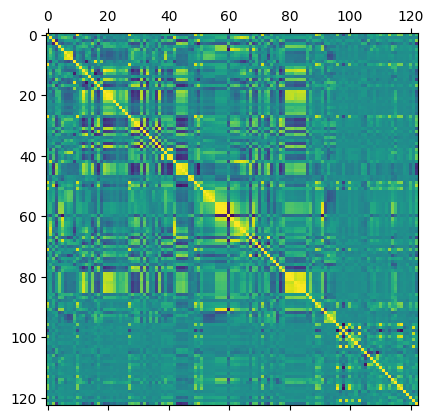

In [4]:
data_q_norm=data_quantitatives-np.mean(data_quantitatives,axis=0)

data_q_norm=data_q_norm/np.std(data_q_norm,axis=0)

matcov=(data_q_norm.T@data_q_norm)
plt.matshow(matcov)
valeurs,vecteurs = np.linalg.eigh(matcov)

valeurs=valeurs[::-1]
vecteurs=vecteurs[:,::-1]

print(vecteurs.shape)
indices=np.argsort(vecteurs[:,0])+np.ones(123)*4
for j,i in enumerate(indices):
    #print(i)
    print(noms[round(i)])

<BarContainer object of 123 artists>

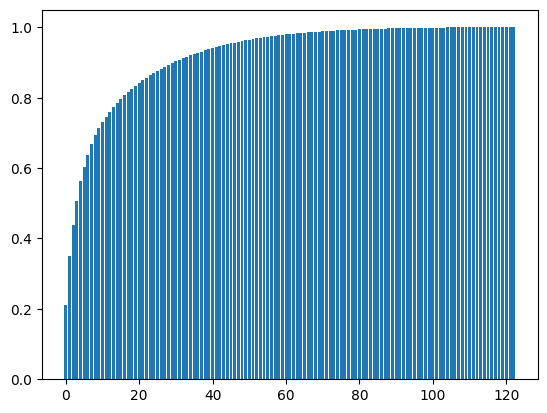

In [39]:
plt.bar(np.arange(valeurs.shape[0]),height=np.cumsum(valeurs)/np.sum(valeurs))